In [10]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from imgaug import augmenters as iaa

In [11]:
labels_file = json.loads(open('./data/key_data.json','r').read())
labels_file

[{'index': 1, 'angle': 0.0, 'speed': 100},
 {'index': 2, 'angle': 0.0, 'speed': 100},
 {'index': 3, 'angle': 0.0, 'speed': 100},
 {'index': 4, 'angle': 0.0, 'speed': 100},
 {'index': 5, 'angle': 0.0, 'speed': 100},
 {'index': 6, 'angle': 0.0, 'speed': 100},
 {'index': 7, 'angle': 0.0, 'speed': 100},
 {'index': 8, 'angle': 0.0, 'speed': 100},
 {'index': 9, 'angle': 0.0, 'speed': 100},
 {'index': 10, 'angle': 0.0, 'speed': 100},
 {'index': 11, 'angle': 0.0, 'speed': 100},
 {'index': 12, 'angle': 0.0, 'speed': 100},
 {'index': 13, 'angle': 0.0, 'speed': 100},
 {'index': 14, 'angle': 0.0, 'speed': 100},
 {'index': 15, 'angle': 0.0, 'speed': 100},
 {'index': 16, 'angle': 0.0, 'speed': 100},
 {'index': 17, 'angle': 0.0, 'speed': 100},
 {'index': 18, 'angle': 0.0, 'speed': 100},
 {'index': 19, 'angle': 0.0, 'speed': 100},
 {'index': 20, 'angle': 0.0, 'speed': 100},
 {'index': 21, 'angle': 0.0, 'speed': 100},
 {'index': 22, 'angle': 0.0, 'speed': 100},
 {'index': 23, 'angle': 0.0, 'speed': 100

In [64]:
rgb_imgs = []
depth_imgs = []
angle_list = []
speed_list = []
for each_sample in tqdm(labels_file, desc='Reading images'):
    path_to_rgb_img = os.path.join('./data/rgb/', '{}_rgb.jpg'.format(each_sample['index']))
    path_to_depth_img = os.path.join('./data/depth/', '{}_depth.jpg'.format(each_sample['index']))
    rgb_imgs.append(cv2.imread(path_to_rgb_img))
    depth_imgs.append(cv2.imread(path_to_depth_img))
    angle_list.append(each_sample['angle'])
    speed_list.append(each_sample['speed'])

Reading images: 100%|██████████| 5587/5587 [00:09<00:00, 585.87it/s]


In [14]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [63]:
augment_object = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=0.03*255)),
    iaa.Sometimes(0.5, iaa.OneOf([
        iaa.GaussianBlur(sigma=0.5),
        iaa.MotionBlur(angle=(0,360))
    ])),
    iaa.GammaContrast(gamma=(0.5, 1.44)),
    iaa.Sometimes(0.3, iaa.OneOf([
        iaa.FastSnowyLandscape(lightness_threshold=(0,150)),
        iaa.Fog()
    ])),
])

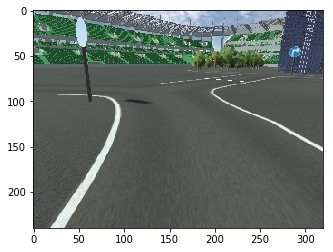

In [16]:
test_img = rgb_imgs[679]
show_img(test_img)

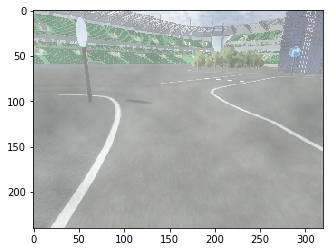

In [60]:
show_img(augment_object.augment_image(test_img))

(array([1757.,    0., 2885.,    3.,   19.,  908.,    0.,    0.,    0.,
          15.]),
 array([-60., -36., -12.,  12.,  36.,  60.,  84., 108., 132., 156., 180.]),
 <a list of 10 Patch objects>)

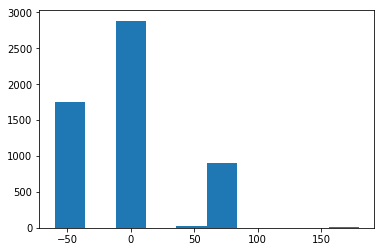

In [65]:
plt.hist(angle_list)

(array([1613.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3974.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 10 Patch objects>)

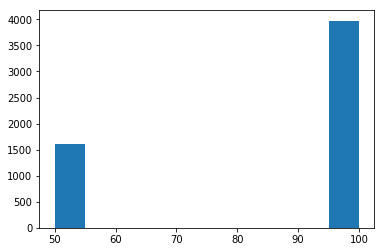

In [66]:
plt.hist(speed_list)